In [68]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Youth Tobacco Survey In Indian States.csv")

In [3]:
df.head(3)

,Unnamed: 0,State,Area,Ever_Tob_Use,Curr_Tob_Use,Ever_Smoke,Curr_Smoke,Ever_Cig,Curr_Cig,Ever_Bidi,Curr_Bidi,Ever_SLT,Curr_SLT,Ever_PM_Tob,Suscept_Cig,Age_Init_Cig,Age_Init_Bidi,Age_Init_SLT,E_Cig_Aware,E_Cig_Ever,Quit_Smoke_12mo,TryQuit_Smoke_12mo,WantQuit_Smoke,Quit_SLT_12mo,TryQuit_SLT_12mo,WantQuit_SLT,Smoke_Exposure,Smoke_Home,Smoke_Enclosed,Smoke_Outdoor,Seen_Smoke_School,Source_Cig_Store,Source_Cig_Paan,Source_Bidi_Store,Source_Bidi_Paan,Source_SLT_Store,Source_SLT_Paan,Bought_Cig_Loc,Bought_Bidi_Loc,Refused_Cig_Sale,Refused_Bidi_Sale,Refused_SLT_Sale,Cig_Stick,Bidi_Stick,Seen_AT_Message,Seen_AT_Media,Seen_AT_Events,Seen_Warnings,Seen_Ads,Seen_Use_Media,Seen_Cig_Ads_POS,Taught_Tob_Effects,Hard_To_Quit,SHS_Harmful,Ban_Indoor,Ban_Outdoor,Aware_COTPA,Fine_Auth,Tobacco_Free_Guideline,Aware_Board_Policy
0,0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,12.5,4.1,4.3,8.4,11.5,10.5,9.9,26.9,2.8,10.6,20.0,20.6,9.4,26.7,24.8,29.5,11.2,21.2,23.4,28.8,39.7,25.2,50.5,27.5,42.0,22.2,69.4,77.6,54.7,52.7,67.0,38.7,28.9,71.3,52.3,35.2,25.2,60.6,52.8,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,8.5,2.1,2.7,6.8,11.2,10.0,10.5,24.7,3.2,14.6,29.3,25.7,13.7,23.7,24.0,33.4,9.0,24.6,26.8,27.1,31.7,27.4,35.0,43.5,37.9,36.0,69.8,75.2,56.3,61.7,50.0,37.3,23.1,74.6,57.1,36.6,26.0,64.6,58.6,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,13.7,4.6,4.7,8.9,11.6,10.7,9.7,27.5,2.6,9.8,18.6,19.8,8.7,27.0,24.9,28.3,11.8,20.3,22.5,29.3,41.7,24.7,54.0,23.8,42.9,18.9,69.3,78.1,54.3,50.6,69.5,39.0,30.2,70.3,50.9,34.8,25.0,59.4,51.1,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2


In [4]:
df.shape

(107, 60)

In [5]:
# Convert numeric-looking object columns
convert_cols = ['Age_Init_Cig', 'Age_Init_Bidi', 'Age_Init_SLT', 'Cig_Stick', 'Seen_Use_Media']
for col in convert_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              107 non-null    int64  
 1   State                   107 non-null    object 
 2   Area                    107 non-null    object 
 3   Ever_Tob_Use            107 non-null    float64
 4   Curr_Tob_Use            107 non-null    float64
 5   Ever_Smoke              107 non-null    float64
 6   Curr_Smoke              107 non-null    float64
 7   Ever_Cig                107 non-null    float64
 8   Curr_Cig                107 non-null    float64
 9   Ever_Bidi               107 non-null    float64
 10  Curr_Bidi               107 non-null    float64
 11  Ever_SLT                107 non-null    float64
 12  Curr_SLT                107 non-null    float64
 13  Ever_PM_Tob             107 non-null    float64
 14  Suscept_Cig             107 non-null    fl

In [7]:
df.describe()

,Unnamed: 0,Ever_Tob_Use,Curr_Tob_Use,Ever_Smoke,Curr_Smoke,Ever_Cig,Curr_Cig,Ever_Bidi,Curr_Bidi,Ever_SLT,Curr_SLT,Ever_PM_Tob,Suscept_Cig,Age_Init_Cig,Age_Init_Bidi,Age_Init_SLT,E_Cig_Aware,E_Cig_Ever,Quit_Smoke_12mo,TryQuit_Smoke_12mo,WantQuit_Smoke,Quit_SLT_12mo,TryQuit_SLT_12mo,WantQuit_SLT,Smoke_Exposure,Smoke_Home,Smoke_Enclosed,Smoke_Outdoor,Seen_Smoke_School,Source_Cig_Store,Source_Cig_Paan,Source_Bidi_Store,Source_Bidi_Paan,Source_SLT_Store,Source_SLT_Paan,Bought_Cig_Loc,Bought_Bidi_Loc,Refused_Cig_Sale,Refused_Bidi_Sale,Refused_SLT_Sale,Cig_Stick,Bidi_Stick,Seen_AT_Message,Seen_AT_Media,Seen_AT_Events,Seen_Warnings,Seen_Ads,Seen_Use_Media,Seen_Cig_Ads_POS,Taught_Tob_Effects,Hard_To_Quit,SHS_Harmful,Ban_Indoor,Ban_Outdoor,Aware_COTPA,Fine_Auth,Tobacco_Free_Guideline,Aware_Board_Policy
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,104.000000,106.000000,94.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,106.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,106.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,53.000000,22.766355,11.361682,14.852336,9.095327,9.910280,5.876636,6.989720,4.190654,16.329907,6.105607,5.014019,7.434579,11.213462,10.685849,10.208511,25.678505,3.893458,16.146729,34.774766,33.415888,16.107477,28.158879,32.691589,36.560748,12.618692,26.743925,29.38785,28.195327,46.519626,24.106542,52.468224,23.898131,50.215888,25.518692,66.142056,65.123364,49.747664,52.097196,48.956075,42.090566,33.163551,74.479439,55.462617,34.436449,30.121495,62.174766,54.495283,18.094393,34.442991,29.076636,71.842056,64.049533,65.040187,86.487850,37.651402,81.426168,82.287850
std,31.032241,19.375305,14.912852,17.127818,12.168366,15.507466,9.949804,9.529467,8.209561,16.004812,10.173085,6.055318,4.716613,2.118804,1.896334,1.699314,10.745732,4.960167,12.634546,22.237076,22.080386,18.112107,22.661475,27.460751,16.253950,10.367312,14.614494,14.51095,12.916849,23.467719,16.428894,23.166027,17.141052,26.016465,21.450131,21.506327,25.384561,25.789743,29.473203,30.942284,21.650613,20.999975,9.158620,10.814748,10.490637,13.095073,13.666431,16.273100,6.708694,10.641146,10.638419,8.629076,12.899125,11.988665,16.363061,18.748879,16.474425,17.817501
min,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,7.000000,6.800000,7.200000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.200000,0.700000,0.70000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.400000,34.400000,0.400000,0.400000,25.600000,12.800000,0.200000,0.300000,0.400000,39.000000,20.400000,26.600000,42.900000,0.000000,33.300000,30.800000
25%,26.500000,10.700000,3.250000,5.700000,2.500000,2.400000,1.050000,2.350000,0.850000,6.950000,1.200000,1.400000,4.300000,9.900000,9.225000,8.825000,17.250000,1.300000,8.250000,19.350000,18.650000,4.950000,12.100000,12.800000,25.750000,5.500000,16.750000,20.15000,19.500000,31.900000,14.750000,38.350000,16.550000,35.700000,15.300000,52.600000,46.050000,30.350000,26.000000,20.950000,29.850000,18.150000,67.600000,49.850000,28.450000,22.100000,53.150000,42.500000,13.800000,25.850000,21.700000,68.250000,53.800000,57.500000,78.900000,23.600000,67.300000,75.000000
50%,53.000000,15.300000,5.500000,8.800000,4.300000,4.200000,2.300000,3.500000,1.800000,9.600000,1.900000,2.900000,6.200000,11.500000,10.700000,10.250000,25.300000,2.200000,13.500000,28.600000,29.000000,11.600000,23.600000,24.800000,31.800000,8.700000,21.800000,25.70000,25.500000,41.900000,23.300000,50.500

In [8]:
df[df.duplicated]

,Unnamed: 0,State,Area,Ever_Tob_Use,Curr_Tob_Use,Ever_Smoke,Curr_Smoke,Ever_Cig,Curr_Cig,Ever_Bidi,Curr_Bidi,Ever_SLT,Curr_SLT,Ever_PM_Tob,Suscept_Cig,Age_Init_Cig,Age_Init_Bidi,Age_Init_SLT,E_Cig_Aware,E_Cig_Ever,Quit_Smoke_12mo,TryQuit_Smoke_12mo,WantQuit_Smoke,Quit_SLT_12mo,TryQuit_SLT_12mo,WantQuit_SLT,Smoke_Exposure,Smoke_Home,Smoke_Enclosed,Smoke_Outdoor,Seen_Smoke_School,Source_Cig_Store,Source_Cig_Paan,Source_Bidi_Store,Source_Bidi_Paan,Source_SLT_Store,Source_SLT_Paan,Bought_Cig_Loc,Bought_Bidi_Loc,Refused_Cig_Sale,Refused_Bidi_Sale,Refused_SLT_Sale,Cig_Stick,Bidi_Stick,Seen_AT_Message,Seen_AT_Media,Seen_AT_Events,Seen_Warnings,Seen_Ads,Seen_Use_Media,Seen_Cig_Ads_POS,Taught_Tob_Effects,Hard_To_Quit,SHS_Harmful,Ban_Indoor,Ban_Outdoor,Aware_COTPA,Fine_Auth,Tobacco_Free_Guideline,Aware_Board_Policy


In [9]:
df.dtypes

Unnamed: 0                  int64
State                      object
Area                       object
Ever_Tob_Use              float64
Curr_Tob_Use              float64
Ever_Smoke                float64
Curr_Smoke                float64
Ever_Cig                  float64
Curr_Cig                  float64
Ever_Bidi                 float64
Curr_Bidi                 float64
Ever_SLT                  float64
Curr_SLT                  float64
Ever_PM_Tob               float64
Suscept_Cig               float64
Age_Init_Cig              float64
Age_Init_Bidi             float64
Age_Init_SLT              float64
E_Cig_Aware               float64
E_Cig_Ever                float64
Quit_Smoke_12mo           float64
TryQuit_Smoke_12mo        float64
WantQuit_Smoke            float64
Quit_SLT_12mo             float64
TryQuit_SLT_12mo          float64
WantQuit_SLT              float64
Smoke_Exposure            float64
Smoke_Home                float64
Smoke_Enclosed            float64
Smoke_Outdoor 

In [10]:
df.isnull().sum()

Unnamed: 0                 0
State                      0
Area                       0
Ever_Tob_Use               0
Curr_Tob_Use               0
Ever_Smoke                 0
Curr_Smoke                 0
Ever_Cig                   0
Curr_Cig                   0
Ever_Bidi                  0
Curr_Bidi                  0
Ever_SLT                   0
Curr_SLT                   0
Ever_PM_Tob                0
Suscept_Cig                0
Age_Init_Cig               3
Age_Init_Bidi              1
Age_Init_SLT              13
E_Cig_Aware                0
E_Cig_Ever                 0
Quit_Smoke_12mo            0
TryQuit_Smoke_12mo         0
WantQuit_Smoke             0
Quit_SLT_12mo              0
TryQuit_SLT_12mo           0
WantQuit_SLT               0
Smoke_Exposure             0
Smoke_Home                 0
Smoke_Enclosed             0
Smoke_Outdoor              0
Seen_Smoke_School          0
Source_Cig_Store           0
Source_Cig_Paan            0
Source_Bidi_Store          0
Source_Bidi_Pa

# 🌍 Step 2: Tobacco Use Overview by State
# ✅ Current Tobacco Use by State – Bar Plot

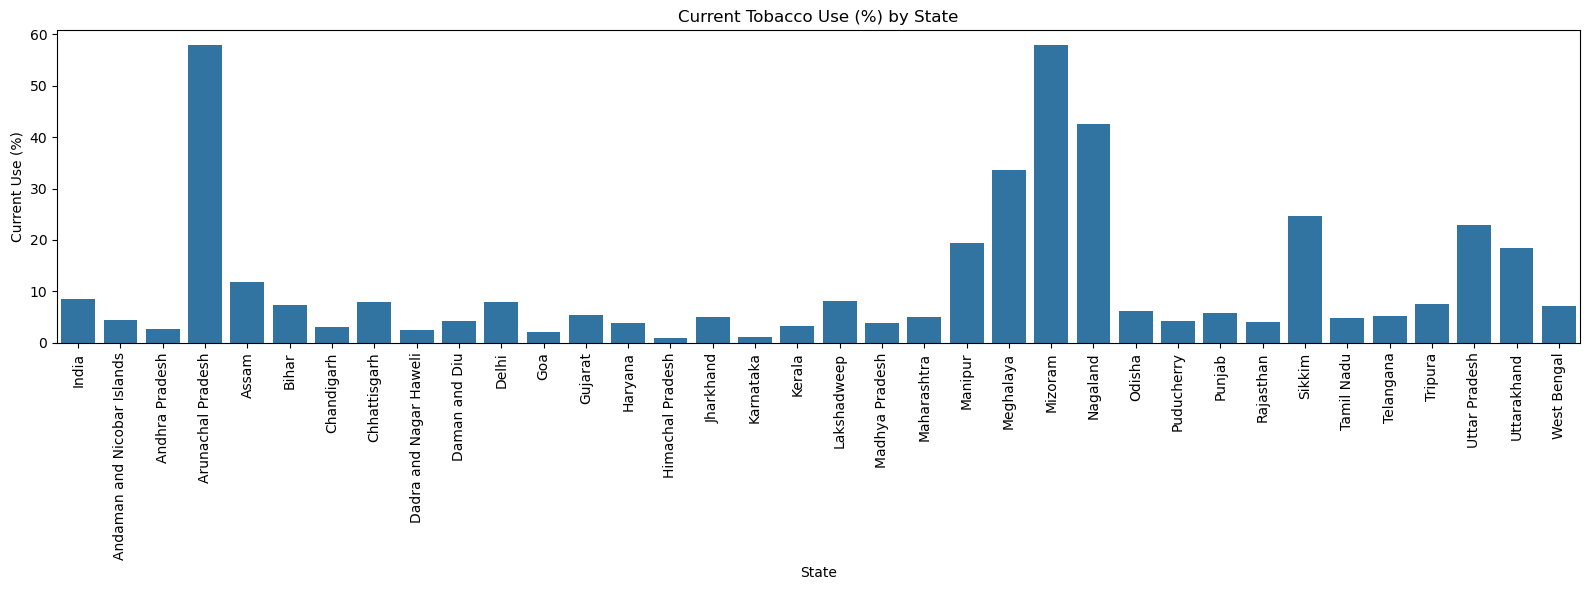

In [12]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df[df['Area'] == 'Total'], x='State', y='Curr_Tob_Use')
plt.xticks(rotation=90)
plt.title('Current Tobacco Use (%) by State')
plt.ylabel('Current Use (%)')
plt.xlabel('State')
plt.tight_layout()
plt.show()

# 🚹 Step 3: Smoking vs Smokeless Use – Comparative View
# ✅ Smokeless vs Smoking – Scatter Plot

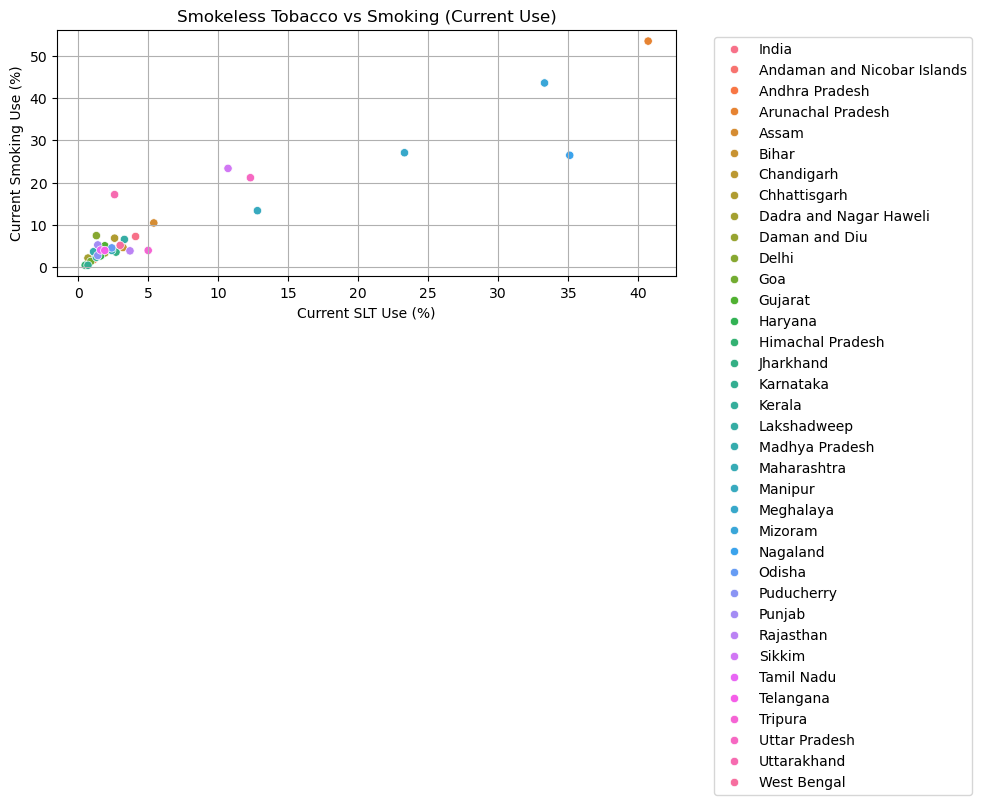

In [14]:
plt.figure(figsize=(10, 6))
total_df = df[df['Area'] == 'Total']
sns.scatterplot(x=total_df['Curr_SLT'], y=total_df['Curr_Smoke'], hue=total_df['State'])
plt.title('Smokeless Tobacco vs Smoking (Current Use)')
plt.xlabel('Current SLT Use (%)')
plt.ylabel('Current Smoking Use (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# 📈 Step 4: Urban vs Rural Use Patterns
# ✅ Tobacco Use by Area – Boxplot

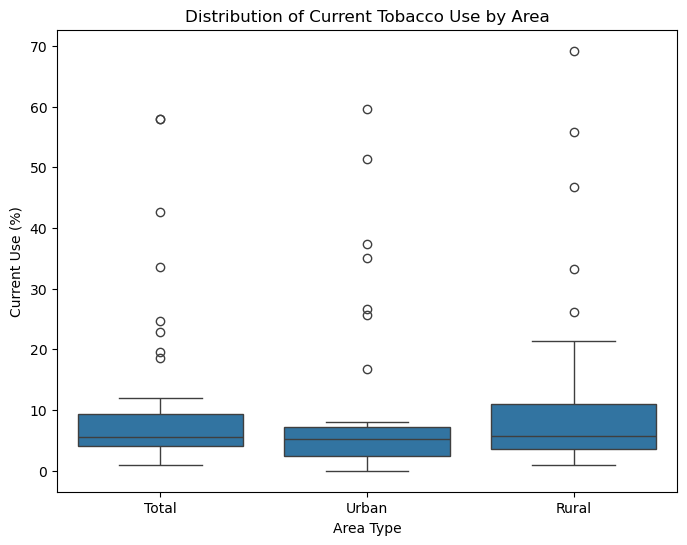

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Area', y='Curr_Tob_Use')
plt.title('Distribution of Current Tobacco Use by Area')
plt.ylabel('Current Use (%)')
plt.xlabel('Area Type')
plt.show()


# 🧒 Step 5: Age of Initiation – Distribution Plot
# ✅ Histogram of Age Initiation for Cigarettes

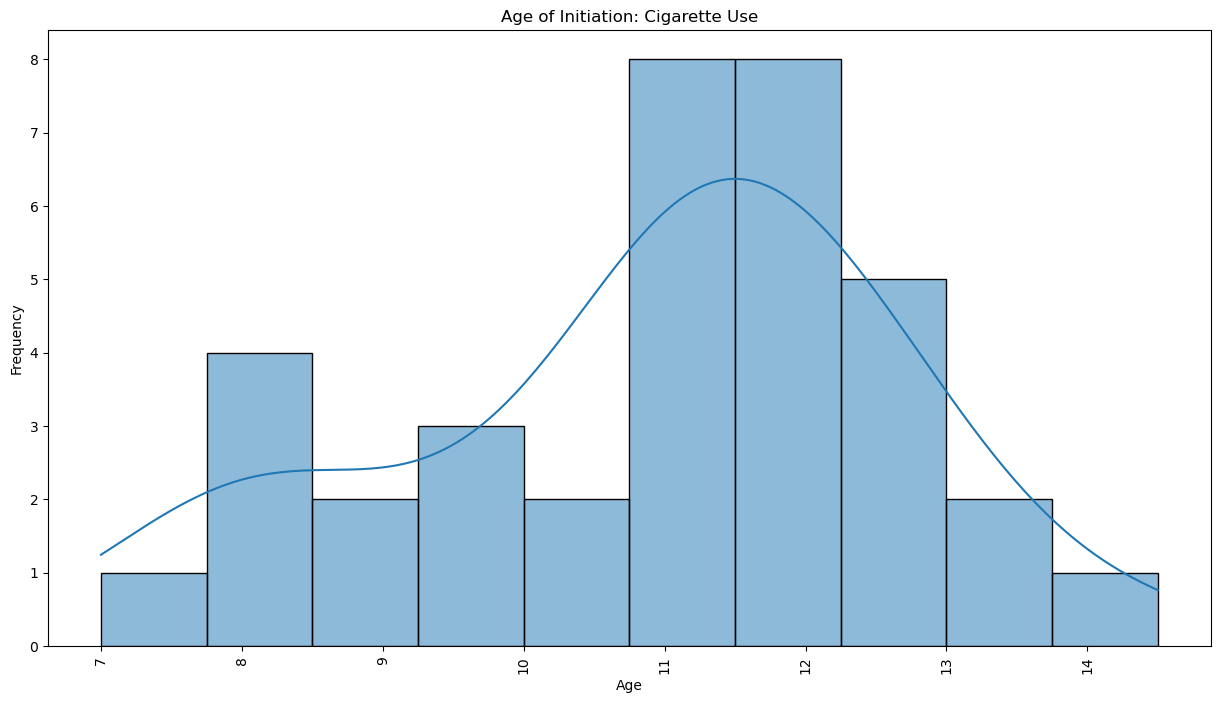

In [18]:
plt.figure(figsize=(15, 8))
sns.histplot(df[df['Area'] == 'Total']['Age_Init_Cig'].dropna(), bins=10, kde=True)
plt.title('Age of Initiation: Cigarette Use')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


# 📌 Step 6: Perception of Harm – Heatmap
# ✅ Tobacco Harm Perception by State

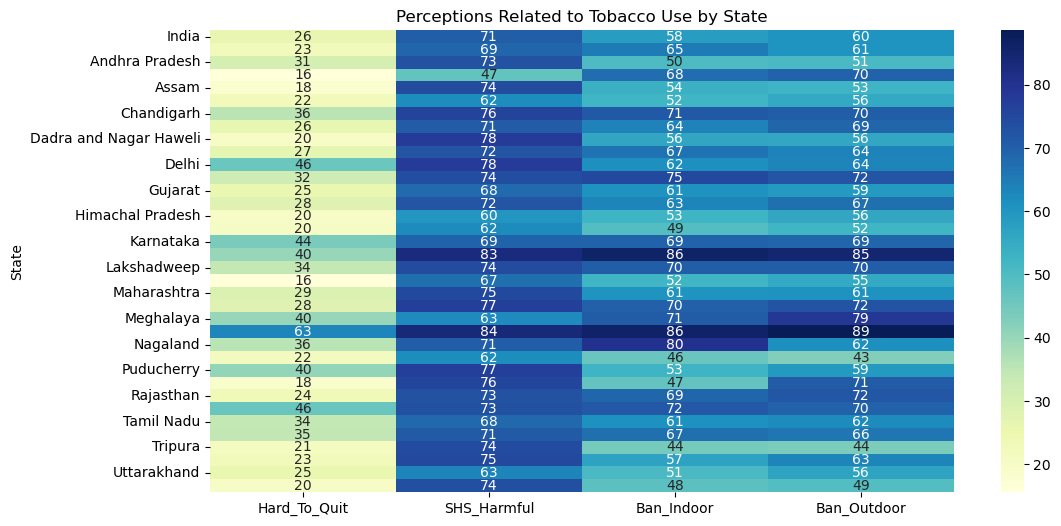

In [20]:
harm_cols = ['Hard_To_Quit', 'SHS_Harmful', 'Ban_Indoor', 'Ban_Outdoor']
heat_df = df[df['Area'] == 'Total'][['State'] + harm_cols].set_index('State')

plt.figure(figsize=(12, 6))
sns.heatmap(heat_df, cmap='YlGnBu', annot=True)
plt.title('Perceptions Related to Tobacco Use by State')
plt.show()


# 🛑 Step 7: Policy Awareness – Pie Chart
# ✅ Awareness of COTPA (Cigarettes and Other Tobacco Products Act)

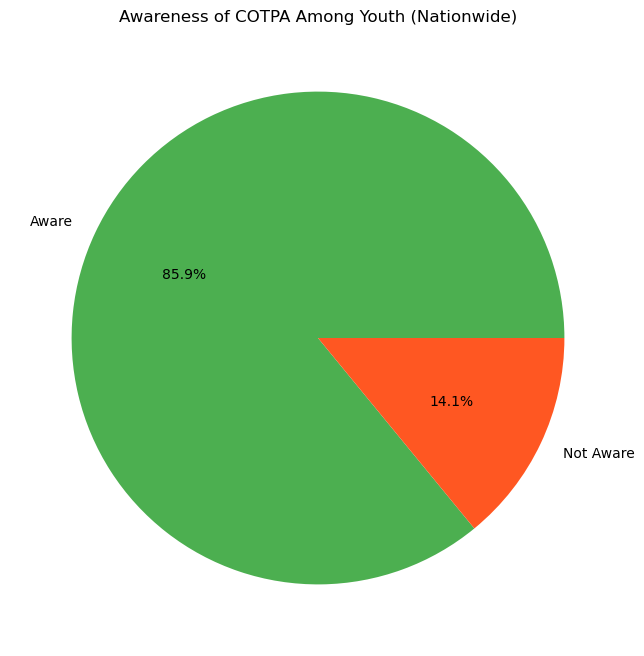

In [22]:
cotpa_total = df[df['Area'] == 'Total']['Aware_COTPA'].mean()
not_aware = 100 - cotpa_total

plt.figure(figsize=(10,8))
plt.pie([cotpa_total, not_aware], labels=['Aware', 'Not Aware'], autopct='%1.1f%%', colors=['#4CAF50', '#FF5722'])
plt.title('Awareness of COTPA Among Youth (Nationwide)')
plt.show()



# 📊 Step 8: Exposure to Advertisements – Horizontal Bar Chart

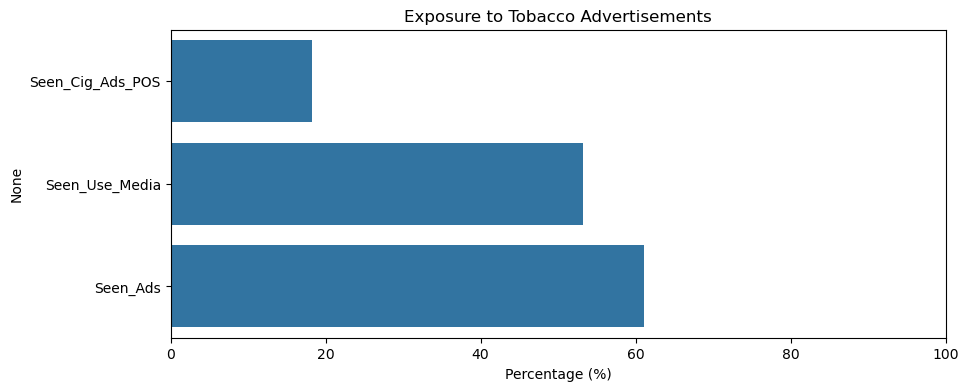

In [24]:
ad_cols = ['Seen_Ads', 'Seen_Use_Media', 'Seen_Cig_Ads_POS']
ad_df = df[df['Area'] == 'Total'][ad_cols].mean().sort_values()

plt.figure(figsize=(10, 4))
sns.barplot(x=ad_df.values, y=ad_df.index)
plt.xlabel('Percentage (%)')
plt.title('Exposure to Tobacco Advertisements')
plt.xlim(0, 100)
plt.show()


# 🧠 Step 9: Susceptibility vs Awareness – Pair Plot
# ✅ How awareness of e-cigarettes relates to susceptibility to smoking

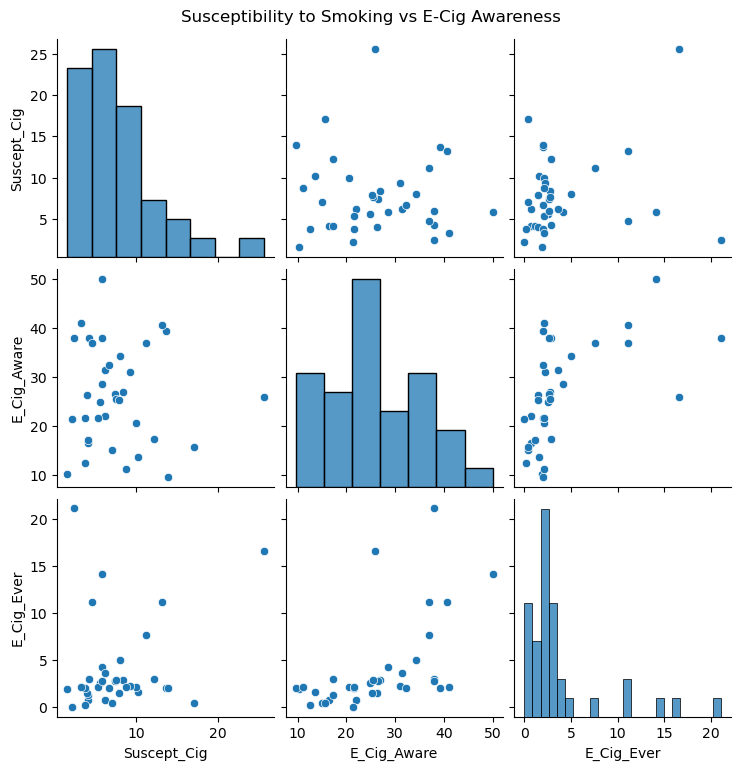

In [47]:
sns.pairplot(df[df['Area'] == 'Total'], vars=['Suscept_Cig', 'E_Cig_Aware', 'E_Cig_Ever'])
plt.suptitle('Susceptibility to Smoking vs E-Cig Awareness', y=1.02)
plt.show()


# 🔄 Step 10: Quit Attempts vs Desire to Quit – Clustered Bar Plot
# ✅ Compare quitting behavior for smoking vs smokeless tobacco

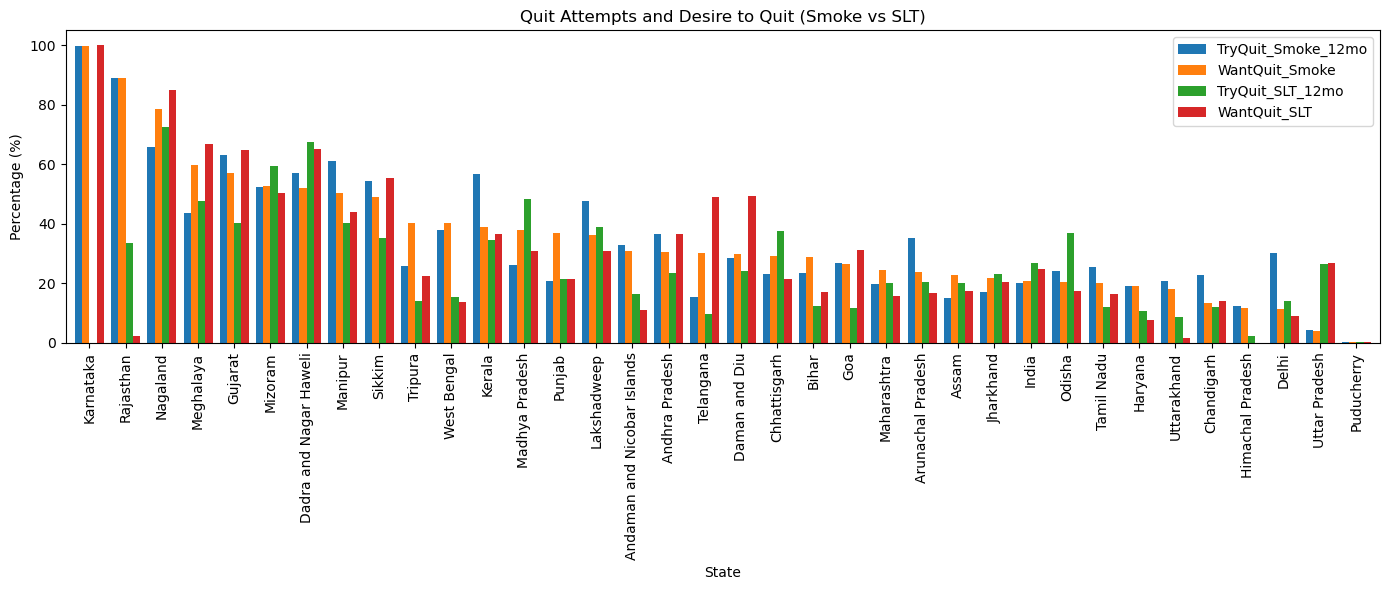

In [49]:
quit_df = df[df['Area'] == 'Total'][['State', 'TryQuit_Smoke_12mo', 'WantQuit_Smoke', 'TryQuit_SLT_12mo', 'WantQuit_SLT']]
quit_df = quit_df.set_index('State').sort_values('WantQuit_Smoke', ascending=False)

quit_df.plot(kind='bar', figsize=(14,6), width=0.8)
plt.title('Quit Attempts and Desire to Quit (Smoke vs SLT)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# 🏫 Step 11: Exposure in School Settings – Grouped Bar Chart
# ✅ Where students see smoking in and around school

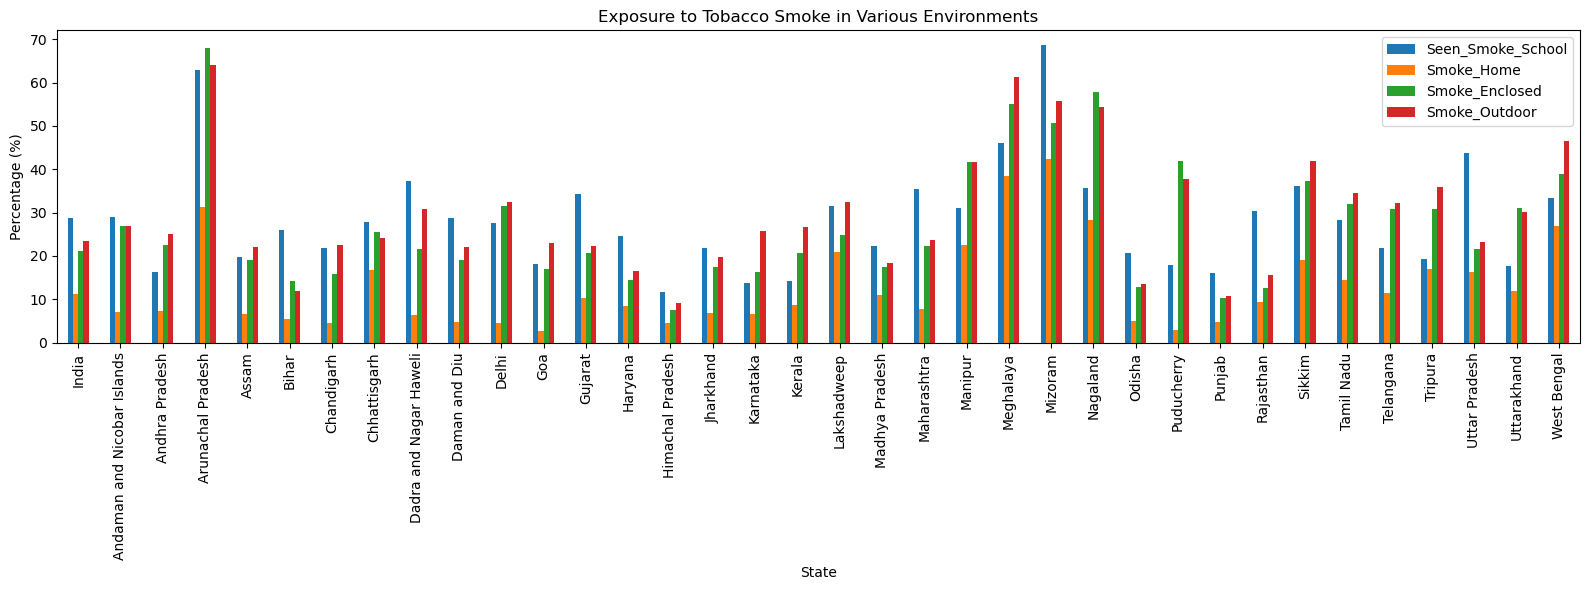

In [58]:
school_cols = ['Seen_Smoke_School', 'Smoke_Home', 'Smoke_Enclosed', 'Smoke_Outdoor']
school_df = df[df['Area'] == 'Total'][['State'] + school_cols].set_index('State')

school_df.plot(kind='bar', figsize=(16,6))
plt.title('Exposure to Tobacco Smoke in Various Environments')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# 🛍️ Step 12: Where Youth Buy Tobacco – Stacked Bar Chart
# ✅ What sources are most common for buying cigarettes, bidis, SLT


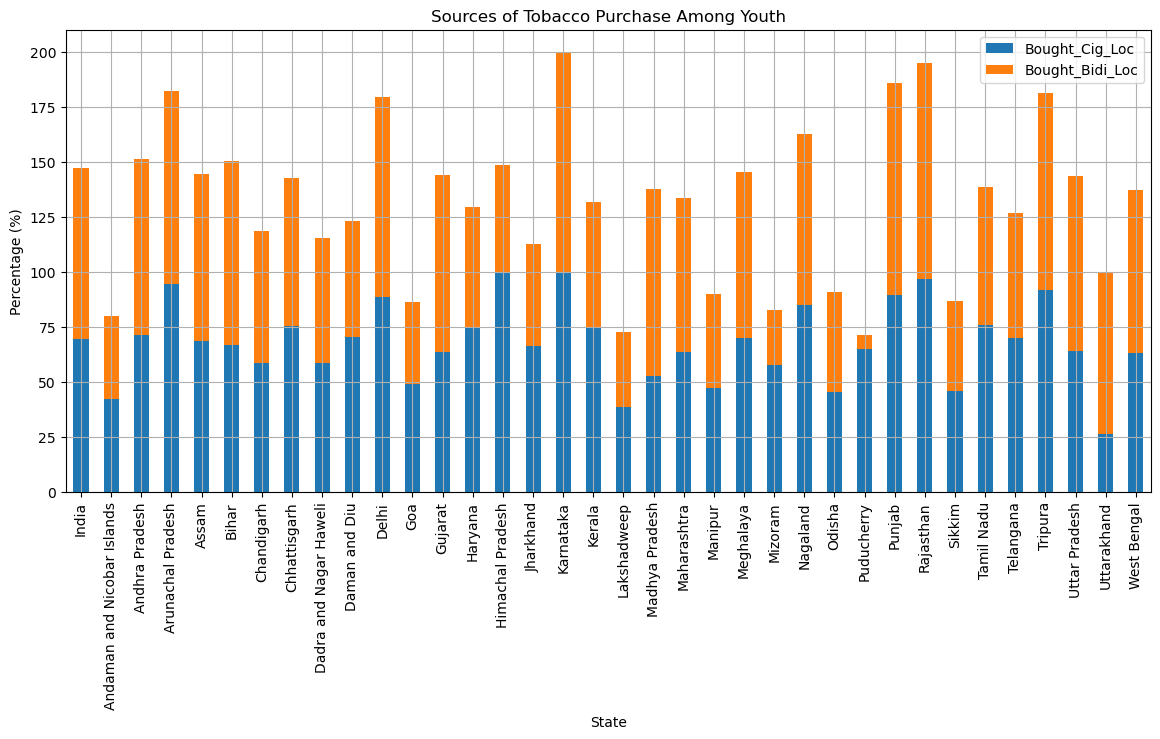

In [63]:
buy_cols = ['Bought_Cig_Loc', 'Bought_Bidi_Loc']
buy_df = df[df['Area'] == 'Total'][['State'] + buy_cols].set_index('State')

buy_df.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Sources of Tobacco Purchase Among Youth')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.tight_layout
plt.grid()
plt.show()


# 👮 Step 13: Policy Awareness – Treemap (Needs squarify library)

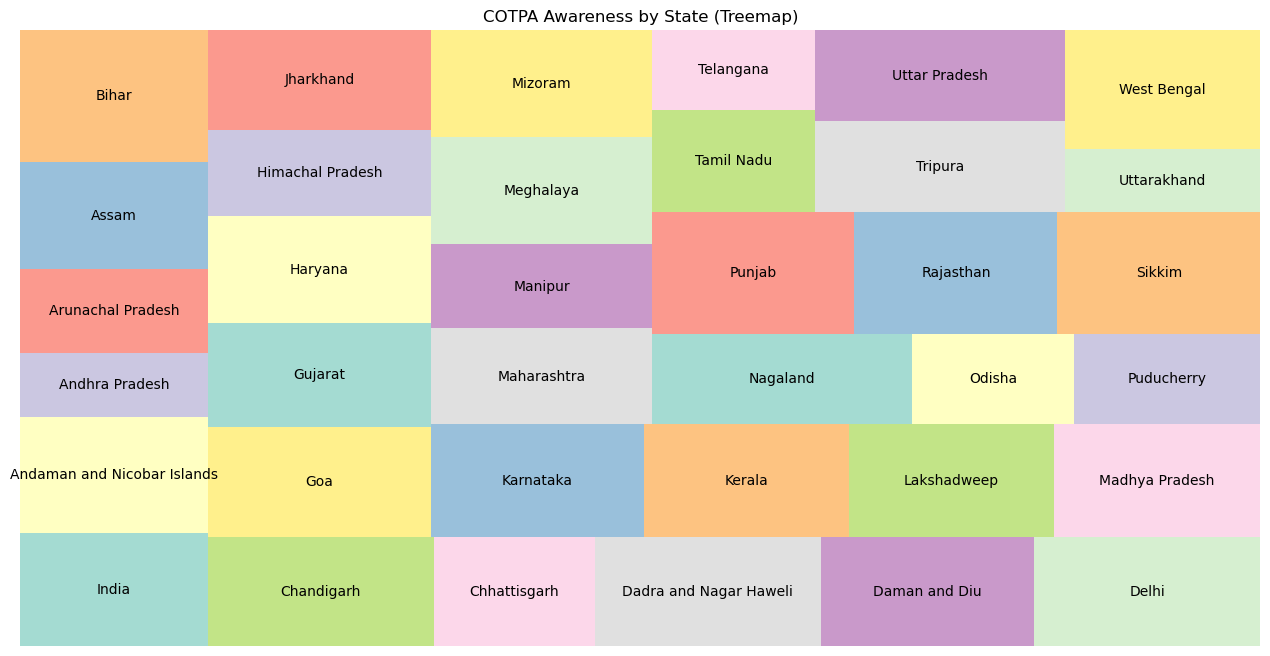

In [70]:
import squarify

policy_df = df[df['Area'] == 'Total'][['State', 'Aware_COTPA', 'Tobacco_Free_Guideline', 'Aware_Board_Policy']]
policy_df.set_index('State', inplace=True)
sizes = policy_df['Aware_COTPA'].dropna()

plt.figure(figsize=(16,8))
squarify.plot(sizes=sizes, label=sizes.index, color=sns.color_palette("Set3"), alpha=.8)
plt.title('COTPA Awareness by State (Treemap)')
plt.axis('off')
plt.show()


In [88]:
state_coords = {
    'Andhra Pradesh': [15.9129, 79.7400],
    'Bihar': [25.0961, 85.3131],
    'Delhi': [28.6139, 77.2090],
    'Karnataka': [15.3173, 75.7139],
    'Maharashtra': [19.7515, 75.7139],
    'Odisha': [20.9517, 85.0985],
    'Tamil Nadu': [11.1271, 78.6569],
    'Uttar Pradesh': [26.8467, 80.9462],
    # Add more as needed…
}


# 🗺️ Step 3: Folium Map – Marker View of Current Tobacco Use

In [112]:
import folium
import webbrowser

# Create base map centered on India
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Sample state coordinates (expand this for your full data)
state_coords = {
    'Delhi': [28.6139, 77.2090],
    'Maharashtra': [19.7515, 75.7139],
    'Tamil Nadu': [11.1271, 78.6569],
    # Add all other states...
}

# Add markers and yellow circle highlights
for i, row in df[df['Area'] == 'Total'].iterrows():
    state = row['State']
    tobacco_use = row['Curr_Tob_Use']
    coords = state_coords.get(state)
    
    if coords:
        # Marker
        folium.Marker(
            location=coords,
            popup=f"<b>{state}</b><br>Current Tobacco Use: {tobacco_use}%",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(m)
        
        # Yellow highlight circle
        folium.Circle(
            location=coords,
            radius=50000,  # 50 km radius (adjust as needed)
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.3
        ).add_to(m)

# Save the map
m.save('tobacco_use_markers_map.html')
m


# 🔵 Step 4: Folium CircleMarkers – Visualize Magnitude

In [110]:
m2 = folium.Map(location=[22.5937, 78.9629], zoom_start=5)

for index, row in total_df.iterrows():
    state = row['State']
    tobacco_use = row['Curr_Tob_Use']
    coords = state_coords.get(state)
    
    if coords:
        folium.CircleMarker(
            location=coords,
            radius=tobacco_use / 2,  # Adjust scale as needed
            popup=f"{state}: {tobacco_use}%",
            color='red',
            fill=True,
            fill_opacity=0.6
        ).add_to(m2)

m2.save('tobacco_use_circle_map.html')
m2
